EDA

In [281]:
import pandas as pd

In [282]:
train_data = pd.read_csv(r"C:\Users\yoges\OneDrive\Desktop\Sid_Programming\club\ML\data\train.csv")
test_data = pd.read_csv(r'C:\Users\yoges\OneDrive\Desktop\Sid_Programming\club\ML\data\test.csv')

In [283]:
train_data = pd.DataFrame(data=train_data)

In [284]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [285]:
import re

In [286]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [287]:
train_data.shape

(891, 13)

In [288]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [289]:
train_data['Age_missing'] = train_data['Age'].isna().astype(int)


In [290]:
train_data[['Age', 'Age_missing']]

,Age,Age_missing
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


In [291]:
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(strategy='mean')
train_data['Age'] = age_imputer.fit_transform(train_data[['Age']])

In [292]:
reduced_data = train_data.drop(['Cabin', 'Name', 'Ticket'], axis=1)
reduced_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_missing
0,1,0,3,male,22.000000,1,0,7.2500,S,Mr,0
1,2,1,1,female,38.000000,1,0,71.2833,C,Mrs,0
2,3,1,3,female,26.000000,0,0,7.9250,S,Miss,0
3,4,1,1,female,35.000000,1,0,53.1000,S,Mrs,0
4,5,0,3,male,35.000000,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,Rev,0
887,888,1,1,female,19.000000,0,0,30.0000,S,Miss,0
888,889,0,3,female,29.699118,1,2,23.4500,S,Miss,1
889,890,1,1,male,26.000000,0,0,30.0000,C,Mr,0


In [293]:
reduced_data.shape

(891, 11)

In [294]:
reduced_data = reduced_data.dropna()

In [295]:
reduced_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Age_missing    0
dtype: int64

In [296]:
reduced_data.shape

(889, 11)

Encoding

In [297]:
from sklearn.preprocessing import OrdinalEncoder
ode = OrdinalEncoder()

In [298]:
reduced_data.loc[:, 'Sex'] = ode.fit_transform(reduced_data[['Sex']])

In [299]:
reduced_data.loc[:, 'Embarked'] = ode.fit_transform(reduced_data[['Embarked']])


In [300]:
reduced_data.loc[:, 'Title'] = ode.fit_transform(reduced_data[['Title']])

In [301]:
reduced_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_missing
0,1,0,3,1.0,22.0,1,0,7.2500,2.0,12.0,0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0,13.0,0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0,9.0,0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0,13.0,0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0,12.0,0


In [302]:
X = reduced_data.drop(['Survived'], axis = 'columns')
y = reduced_data['Survived']

Feature Scaling

In [303]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [304]:
reduced_data_scaled = std_scaler.fit_transform(X)
X = pd.DataFrame(reduced_data_scaled, columns=X.columns)

In [305]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_missing
0,-1.732505,0.825209,0.735342,-0.590495,0.431350,-0.474326,-0.500240,0.586840,0.417698,-0.498594
1,-1.728611,-1.572211,-1.359911,0.643971,0.431350,-0.474326,0.788947,-1.939555,0.954308,-0.498594
2,-1.724718,0.825209,-1.359911,-0.281878,-0.475199,-0.474326,-0.486650,0.586840,-1.192130,-0.498594
3,-1.720825,-1.572211,-1.359911,0.412509,0.431350,-0.474326,0.422861,0.586840,0.954308,-0.498594
4,-1.716931,0.825209,0.735342,0.412509,-0.475199,-0.474326,-0.484133,0.586840,0.417698,-0.498594


In [306]:
X.shape, y.shape

((889, 10), (889,))

Data Splitting

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [309]:
X_train.shape, X_test.shape

((800, 10), (89, 10))

In [310]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Age_missing'],
      dtype='object')

Correlation

In [311]:
corr = reduced_data.corr()

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

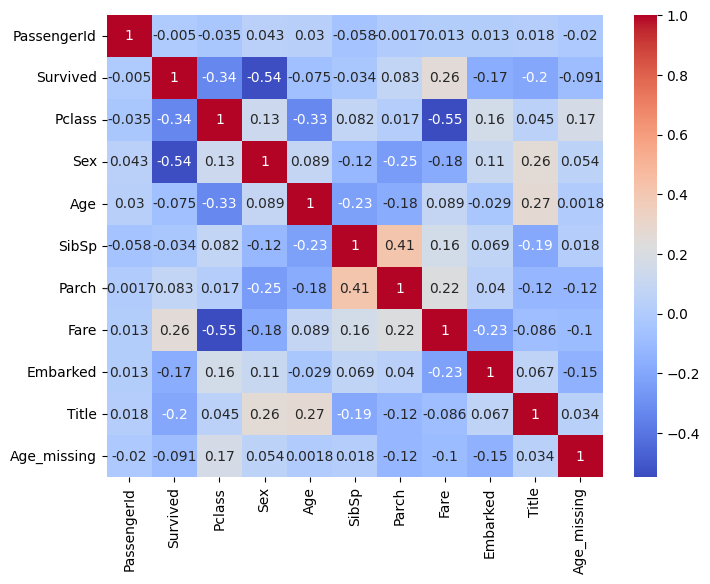

In [313]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Random Forest

In [314]:
from sklearn.ensemble import RandomForestClassifier

In [315]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [316]:
y_pred_rf = rnd_clf.predict(X_test)

In [317]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)


0.8426966292134831

In [318]:
from sklearn.model_selection import cross_val_score
import numpy as np
def cross_val(classier, num_splits = 10):
    model = classier
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(np.round(scores, 2))
    print(scores.mean())
cross_val(RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1))

[0.81 0.8  0.81 0.8  0.89 0.8  0.82 0.82 0.82 0.81]
0.82


In [319]:
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rnd_clf.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


       Feature  Importance
2          Sex    0.329955
8        Title    0.188372
6         Fare    0.135646
1       Pclass    0.124393
3          Age    0.071103
4        SibSp    0.055598
0  PassengerId    0.048833
5        Parch    0.021462
7     Embarked    0.020335
9  Age_missing    0.004303
